 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [8]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [9]:
# Reading whale returns (whale returns data frame called = wr_df)
whale_returns_csv = Path("Resources/whale_returns.csv")
wr_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
wr_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [10]:
# Count nulls
wr_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [11]:
# Drop nulls
wr_df.dropna(inplace=True)
wr_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [12]:
wr_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [13]:
# Reading algorithmic returns (algo trading data frame called = ar_df)
algo_returns_csv = Path("Resources/algo_returns.csv")
ar_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
ar_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [14]:
# Count nulls
ar_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [15]:

# Drop nulls
ar_df.dropna(inplace=True)
ar_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [16]:
ar_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [17]:
# Reading S&P 500 Closing Prices (S&P 500 data frame called = sp500_df)

sp500_history_csv = Path("Resources/sp500_history.csv") 
sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [18]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [19]:
# Fix Data Types 
## Drop $ first in 'Close' and then change the data type
sp500_df['Close'] = sp500_df['Close'].str.replace('$', ' ')
sp500_df.head(5)

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [20]:
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df.dtypes

Close    float64
dtype: object

In [21]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [22]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [23]:
# Rename Column
sp500_daily_returns.columns = ['S&P 500']
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [24]:
sp500_df = sp500_daily_returns
sp500_df.head(5)

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [25]:
# Concatenate all DataFrames into a single DataFrame
combined_daily_df = pd.concat([wr_df, ar_df, sp500_df], axis="columns", join="inner")
combined_daily_df.sort_index(inplace=True)
combined_daily_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


In [26]:
len(combined_daily_df)

1043

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

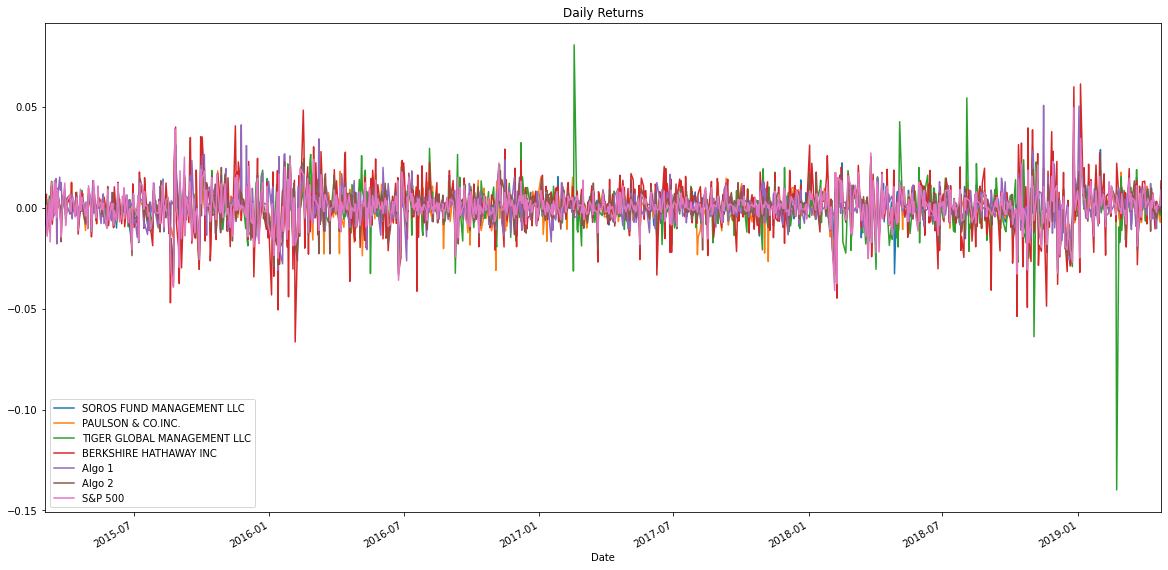

In [48]:
# Plot daily returns
combined_daily_df.plot(xlim=("2015-03-03", "2019-04-23"), figsize=(20,10),title=('Daily Returns'))

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

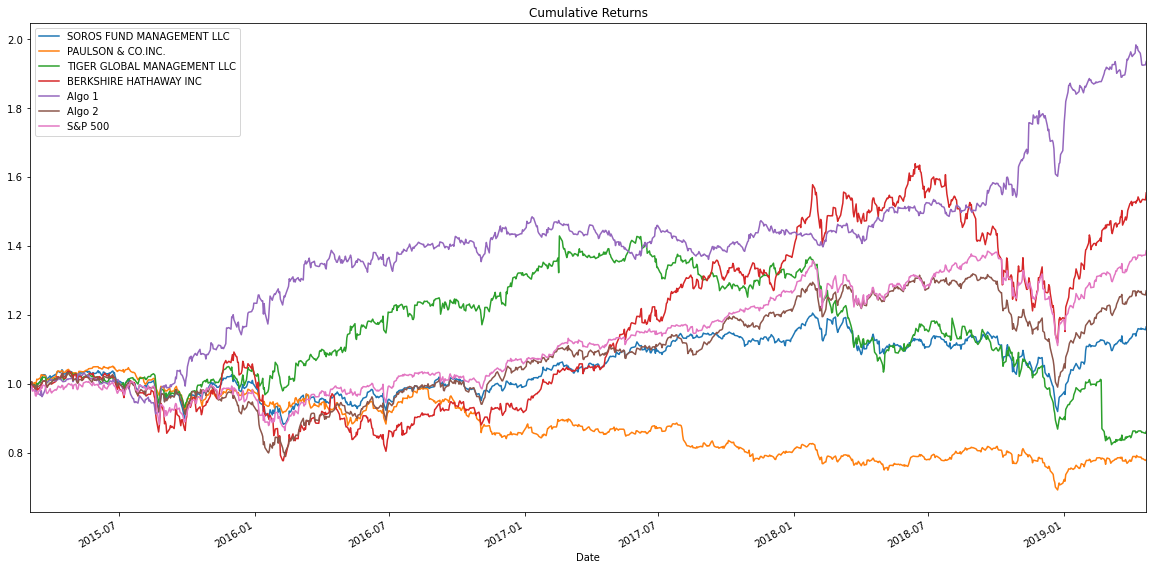

In [27]:
# Plot cumulative returns
cum_returns_df = (1+ combined_daily_df).cumprod()
cum_returns_df.plot(xlim=("2015-03-03", "2019-04-23"),figsize = (20,10),title=('Cumulative Returns'))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:title={'center':'Portfolio Risk'}>

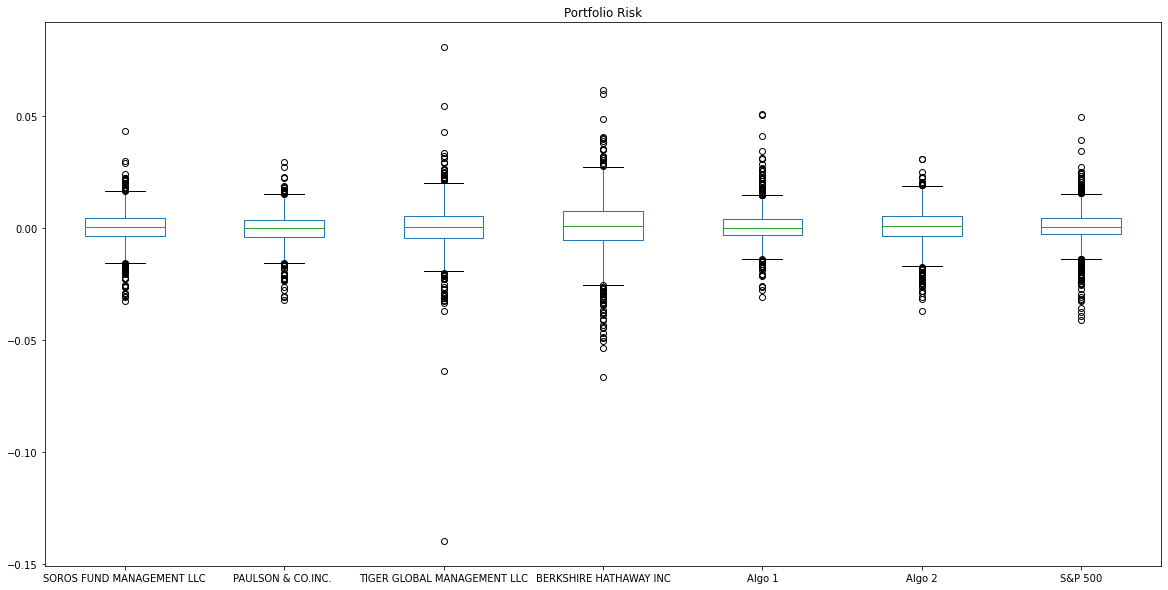

In [28]:
# Box plot to visually show risk
combined_daily_df.plot(kind = "box", figsize = (20,10), title='Portfolio Risk')

In [29]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?

combined_std_df = combined_daily_df.std()
combined_std_df

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [30]:
# Determine which portfolios are riskier than the S&P 500
sp500_std = combined_std_df["S&P 500"]
combined_std_df > sp500_std     

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [31]:
riskier_than_sp500 = combined_std_df[combined_std_df > combined_std_df["S&P 500"]]
print( riskier_than_sp500)    

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


In [32]:
# YOUR CODE HERE

In [33]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std_df*np.sqrt(252)
annualized_std 

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

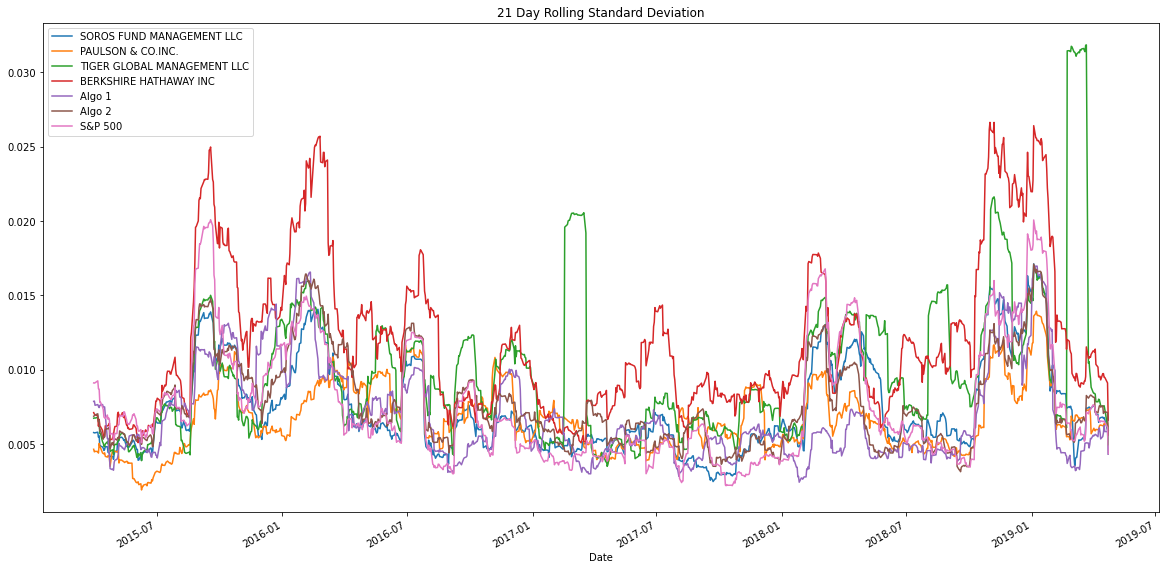

In [36]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
std_rolling_21 = combined_daily_df.rolling(window=21).std()
std_rolling_21.plot(figsize=(20,10), title= "21 Day Rolling Standard Deviation")

In [37]:
# Construct a correlation table
# YOUR CODE HERE
correlation = combined_daily_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [38]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
#Caluculate covaiance and variance
bh_covariance = combined_daily_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_daily_df['S&P 500'])
bh_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000055
2019-04-17    0.000049
2019-04-18    0.000049
2019-04-22    0.000049
2019-04-23    0.000048
Length: 1043, dtype: float64

In [39]:
variance = combined_daily_df['S&P 500'].rolling(window=60).var()
variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: S&P 500, Length: 1043, dtype: float64

In [40]:
bh_beta = bh_covariance/variance
bh_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    1.337986
2019-04-17    1.301791
2019-04-18    1.302226
2019-04-22    1.304125
2019-04-23    1.278284
Length: 1043, dtype: float64

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC Beta'}, xlabel='Date'>

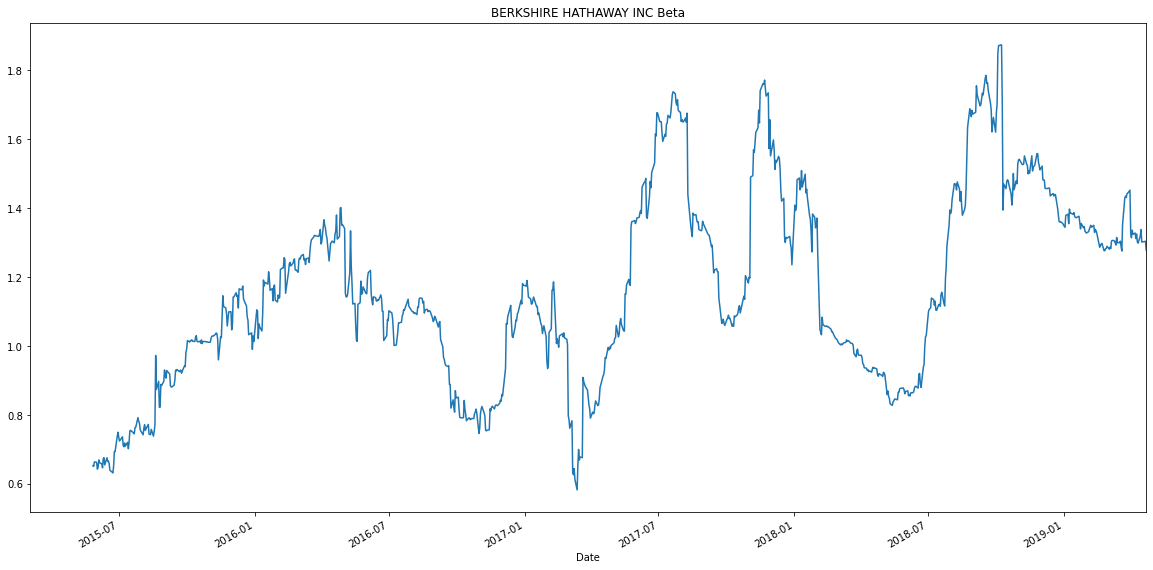

In [49]:
bh_beta.plot(xlim=("2015-03-03", "2019-04-23"),figsize=(20, 10), title='BERKSHIRE HATHAWAY INC Beta')

In [47]:
#rolling_bh_covariance = combined_daily_df['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_daily_df['S&P 500'])
#rolling_variance = combined_daily_df['S&P 500'].rolling(window=21).var()
#rolling_bh_beta = rolling_bh_covariance / rolling_variance
#rolling_bh_beta.tail(5)

In [48]:
#rolling_bh_beta.dropna(inplace=True)
#rolling_bh_beta.head(5)

In [46]:
# (Your graph may differ, dependent upon which portfolio you are comparing)
#ax = rolling_bh_beta.plot(xlim=("2015-03-03", "2019-04-23"),figsize=(20, 10), title='BERKSHIRE HATHAWAY INC Beta')

In [50]:
# YOUR CODE HERE

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

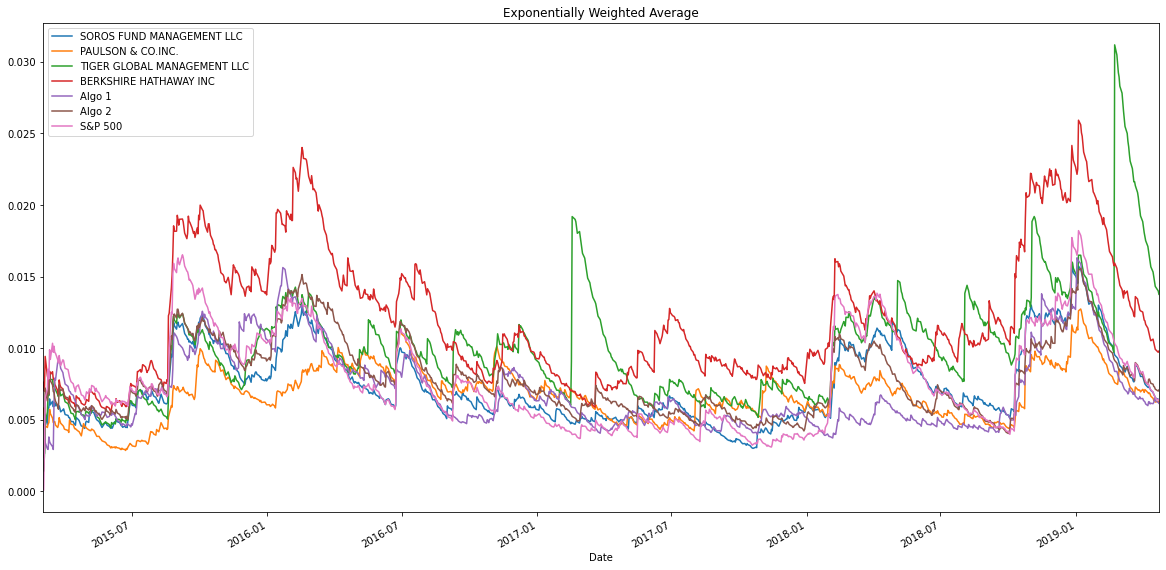

In [56]:
combined_daily_df.ewm(21).std().plot(xlim=("2015-03-03", "2019-04-23"),figsize=(20, 10),title='Exponentially Weighted Average') 

In [54]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [57]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_daily_df.mean() * 252) / (combined_daily_df.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378648
dtype: float64

<AxesSubplot:>

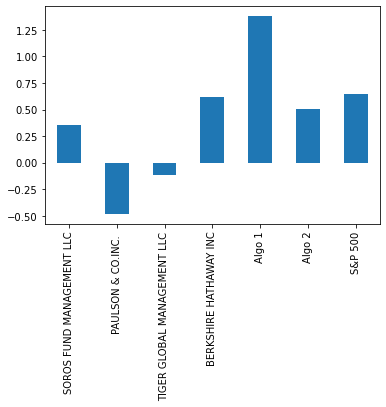

In [58]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [60]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Set the file paths

lvmuy_data = Path("./Resources/lvmuy_ticker.csv")
csco_data = Path("./Resources/csco_ticker.csv")
nflx_data = Path("./Resources/nflx_ticker.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
lvmuy_df = pd.read_csv(lvmuy_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
csco_df = pd.read_csv(csco_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
nflx_df = pd.read_csv(nflx_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

nflx_df.head(5)


,Close
Date,
2018-10-01 16:00:00,381.43
2018-10-02 16:00:00,377.14
2018-10-03 16:00:00,377.05
2018-10-04 16:00:00,363.65
2018-10-05 16:00:00,351.35


In [76]:
lvmuy_df2 = lvmuy_df.reset_index()
lvmuy_df2["Date"] = lvmuy_df2["Date"].dt.date
lvmuy_df2.set_index("Date", inplace = True)
lvmuy_df2

,Close
Date,
2018-10-01,70.82
2018-10-02,69.48
2018-10-03,69.71
2018-10-04,66.14
2018-10-05,65.82
...,...
2020-09-24,93.90
2020-09-25,93.95
2020-09-28,94.34


In [75]:
csco_df2 = csco_df.reset_index()
csco_df2["Date"] = csco_df2["Date"].dt.date
csco_df2.set_index("Date", inplace = True)
csco_df2

,Close
Date,
2018-10-01,48.87
2018-10-02,49.01
2018-10-03,49.14
2018-10-04,48.38
2018-10-05,48.13
...,...
2020-09-24,37.85
2020-09-25,38.45
2020-09-28,39.13


In [73]:
nflx_df2 = nflx_df.reset_index()
nflx_df2["Date"] = nflx_df2["Date"].dt.date
nflx_df2.set_index("Date", inplace = True)
nflx_df2

,Close
Date,
2018-10-01,381.43
2018-10-02,377.14
2018-10-03,377.05
2018-10-04,363.65
2018-10-05,351.35
...,...
2020-09-24,473.08
2020-09-25,482.88
2020-09-28,490.65


In [77]:
combined_port_df = pd.concat([lvmuy_df2, csco_df2, nflx_df2], axis="columns", join="inner")
combined_daily_df.sort_index(inplace=True)
combined_port_df.head(5)

,Close,Close,Close
Date,,,
2018-10-01,70.82,48.87,381.43
2018-10-02,69.48,49.01,377.14
2018-10-03,69.71,49.14,377.05
2018-10-04,66.14,48.38,363.65
2018-10-05,65.82,48.13,351.35


In [78]:
#column names
combined_port_df.columns = ['LVMUY', 'CSCO','NFLX']
combined_port_df.head(5)

,LVMUY,CSCO,NFLX
Date,,,
2018-10-01,70.82,48.87,381.43
2018-10-02,69.48,49.01,377.14
2018-10-03,69.71,49.14,377.05
2018-10-04,66.14,48.38,363.65
2018-10-05,65.82,48.13,351.35


In [79]:
combined_port_df.dtypes

LVMUY    float64
CSCO     float64
NFLX     float64
dtype: object

In [86]:
#count nulls
combined_port_df.isnull().sum()

LVMUY    0
CSCO     0
NFLX     0
dtype: int64

,LVMUY,CSCO,NFLX
Date,,,
2018-10-01,70.82,48.87,381.43
2018-10-02,69.48,49.01,377.14
2018-10-03,69.71,49.14,377.05
2018-10-04,66.14,48.38,363.65
2018-10-05,65.82,48.13,351.35


In [92]:
#calculate daily returns
daily_returns = combined_port_df.pct_change()
daily_returns.head()

,LVMUY,CSCO,NFLX
Date,,,
2018-10-01,NaN,NaN,NaN
2018-10-02,-0.018921,0.002865,-0.011247
2018-10-03,0.003310,0.002653,-0.000239
2018-10-04,-0.051212,-0.015466,-0.035539
2018-10-05,-0.004838,-0.005167,-0.033824


In [ ]:
#count nulls
daily_returns.isnull().sum()

In [95]:
#drop nulls and verify
daily_returns.dropna(inplace=True)
daily_returns.head()

,LVMUY,CSCO,NFLX
Date,,,
2018-10-02,-0.018921,0.002865,-0.011247
2018-10-03,0.003310,0.002653,-0.000239
2018-10-04,-0.051212,-0.015466,-0.035539
2018-10-05,-0.004838,-0.005167,-0.033824
2018-10-08,-0.010027,-0.012674,-0.006404


In [96]:
daily_returns.isnull().sum()

LVMUY    0
CSCO     0
NFLX     0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [99]:
# Calculate weighted portfolio returns = "cr" --> custom returns
weights = [1/3, 1/3, 1/3]
cr_df = daily_returns.dot(weights)
cr_df.head()

Date
2018-10-02   -0.009101
2018-10-03    0.001908
2018-10-04   -0.034072
2018-10-05   -0.014610
2018-10-08   -0.009702
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [107]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
combined_daily_df2 = pd.concat([wr_df, ar_df, sp500_df, cr_df], axis="columns", join="inner")
combined_daily_df2.sort_index(inplace=True)
combined_daily_df2.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.014701
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.002130
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.006183
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.014354
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.000782


In [110]:
combined_daily_df2.columns = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'S&P 500', 'Custom']
combined_daily_df2.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-10-02,0.001562,0.005214,0.001470,-0.009741,0.001833,-0.006589,-0.000397,-0.009101
2018-10-03,0.002575,0.001456,-0.003772,0.002983,-0.000526,0.006670,0.000711,0.001908
2018-10-04,-0.010206,-0.008663,-0.004069,-0.027458,0.000144,-0.013089,-0.008170,-0.034072
2018-10-05,-0.010609,-0.004303,-0.000684,-0.015004,-0.003506,-0.007022,-0.005528,-0.014610
2018-10-08,-0.003268,-0.000671,0.013890,-0.008058,-0.004040,-0.005825,-0.000395,-0.009702


In [113]:
 #Check for nulls
combined_daily_df2.isnull().sum()
#No nulls so no drop

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom                         0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [114]:
combined_std_df2 = combined_daily_df2.std()
combined_std_df2

SOROS FUND MANAGEMENT LLC      0.011134
PAULSON & CO.INC.              0.008779
TIGER GLOBAL MANAGEMENT LLC    0.017179
BERKSHIRE HATHAWAY INC         0.018291
Algo 1                         0.010237
Algo 2                         0.010671
S&P 500                        0.011792
Custom                         0.019117
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

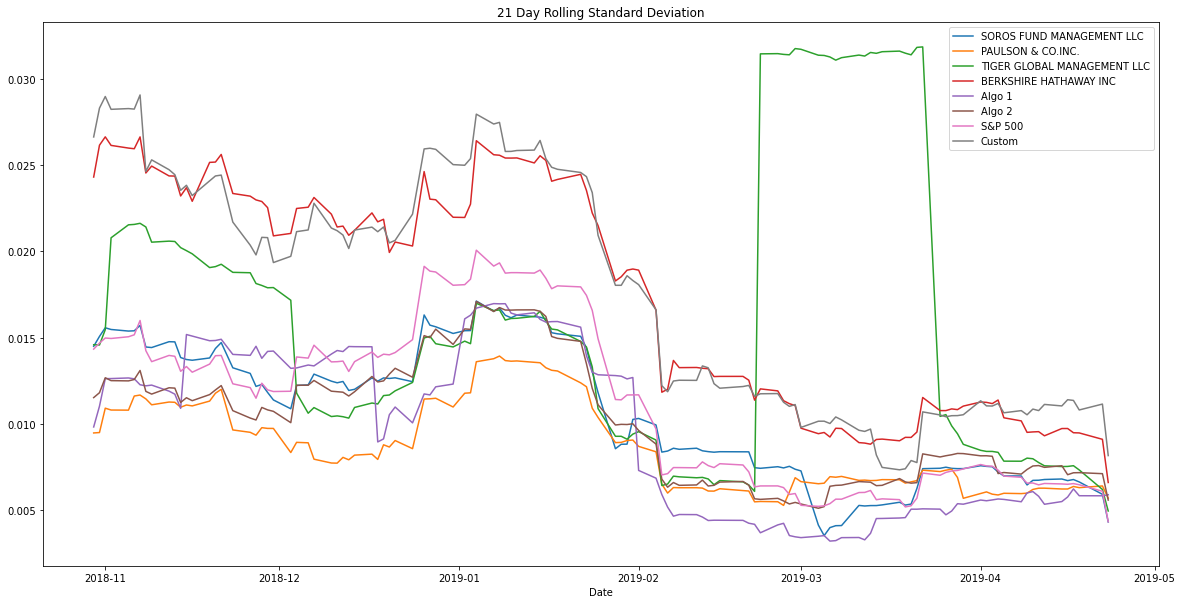

In [116]:
# Rolling
std2_rolling_21 = combined_daily_df2.rolling(window=21).std()
std2_rolling_21.plot(figsize=(20,10), title= "21 Day Rolling Standard Deviation")

In [117]:
# Annualized Sharpe Ratios
sharpe_ratios2 = (combined_daily_df2.mean() * 252) / (combined_daily_df2.std() * np.sqrt(252))
sharpe_ratios2.sort_values()

TIGER GLOBAL MANAGEMENT LLC   -1.498672
PAULSON & CO.INC.             -0.468403
Algo 2                        -0.148505
S&P 500                        0.122982
SOROS FUND MANAGEMENT LLC      0.368309
BERKSHIRE HATHAWAY INC         0.595171
Custom                         0.710443
Algo 1                         2.350432
dtype: float64

<AxesSubplot:>

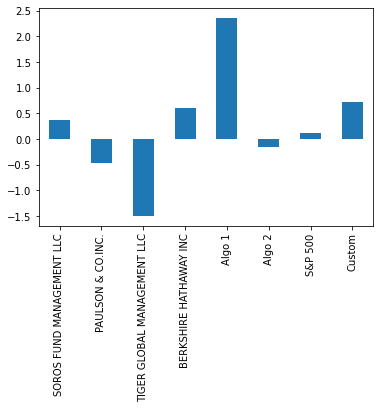

In [121]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot.bar()

In [123]:
# Create a correlation analysis
correlation2 = combined_daily_df2.corr()
correlation2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.818800,0.488955,0.856647,0.396308,0.884079,0.896824,0.809651
PAULSON & CO.INC.,0.818800,1.000000,0.477375,0.705215,0.440674,0.828477,0.791994,0.692657
TIGER GLOBAL MANAGEMENT LLC,0.488955,0.477375,1.000000,0.351660,0.166953,0.403400,0.486220,0.347670
BERKSHIRE HATHAWAY INC,0.856647,0.705215,0.351660,1.000000,0.397908,0.824380,0.886177,0.869071
Algo 1,0.396308,0.440674,0.166953,0.397908,1.000000,0.443676,0.346369,0.358112
Algo 2,0.884079,0.828477,0.403400,0.824380,0.443676,1.000000,0.894643,0.788397
S&P 500,0.896824,0.791994,0.486220,0.886177,0.346369,0.894643,1.000000,0.870603
Custom,0.809651,0.692657,0.347670,0.869071,0.358112,0.788397,0.870603,1.000000


In [125]:
#Plot custom Beta
custom_covariance = combined_daily_df2['Custom'].rolling(window=60).cov(combined_daily_df['S&P 500'])
custom_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000048
2019-04-17    0.000044
2019-04-18    0.000044
2019-04-22    0.000044
2019-04-23    0.000041
Length: 1043, dtype: float64

In [126]:
variance2 = combined_daily_df['S&P 500'].rolling(window=60).var()
variance2

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: S&P 500, Length: 1043, dtype: float64

In [127]:
custom_beta = custom_covariance/variance2
custom_beta


Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    1.175874
2019-04-17    1.178032
2019-04-18    1.177508
2019-04-22    1.174651
2019-04-23    1.108801
Length: 1043, dtype: float64

<AxesSubplot:title={'center':'Custom Portfolio Beta'}, xlabel='Date'>

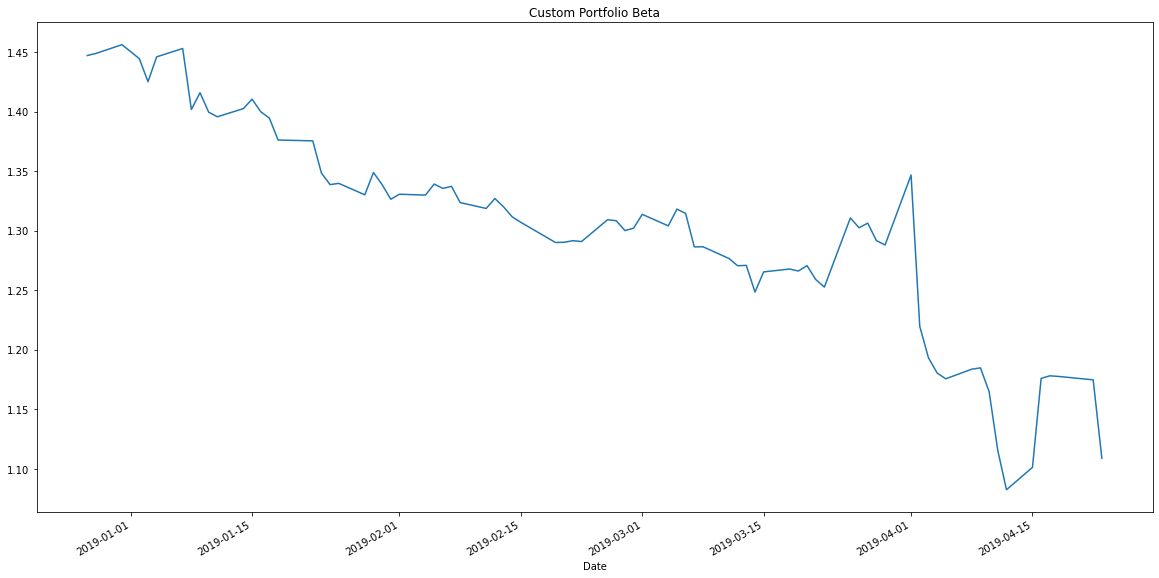

In [129]:
custom_beta.plot(figsize=(20, 10), title='Custom Portfolio Beta')

In [130]:
# YOUR CODE HERE